# Titanic spaceship - exploratory analysis and data prep

In [1]:
import pandas as pd
import numpy as np
import ydata_profiling
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
tt_train = pd.read_csv('train.csv')
tt_test = pd.read_csv('test.csv')

In [3]:
merged = pd.concat([tt_train, tt_test], axis = 0)

In [4]:
merged.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
#pandas profiling

#report = merged.profile_report()
#report.to_file(output_file = "spaceship_report.html")

In [6]:
merged.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [7]:
merged['Transported'] = merged['Transported'].map({True: 1,False: 0})

First 4 digits in ID indicate groupID. Let's calculate group count based on that. 

In [8]:
merged['GroupId'] = merged['PassengerId'].str.split('_', expand = True)[0]
merged['Group_count'] = merged.groupby('GroupId')['GroupId'].transform('count')

In [9]:
display(merged.groupby('Group_count')['Transported'].mean())

Group_count
1    0.452445
2    0.538050
3    0.593137
4    0.640777
5    0.592453
6    0.614943
7    0.541126
8    0.394231
Name: Transported, dtype: float64

In [10]:
#creating binary variable 'single'

merged['Single'] = [1 if x == 1 else 0 for x in merged['Group_count']]

In [11]:
display(merged.groupby('Single')['Transported'].mean())

Single
0    0.566872
1    0.452445
Name: Transported, dtype: float64

Home Planet seems to be important for predicting transportation. 

C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

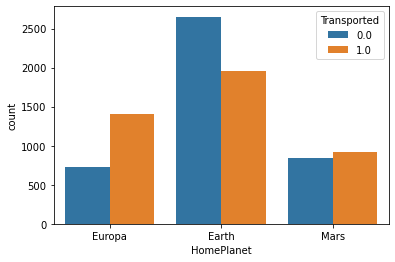

In [12]:
sn.countplot(merged['HomePlanet'], hue = merged['Transported'])

In [13]:
merged['HomePlanet'].fillna('Earth', inplace = True)

Most people in cryo capsules got tranposrted.

C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

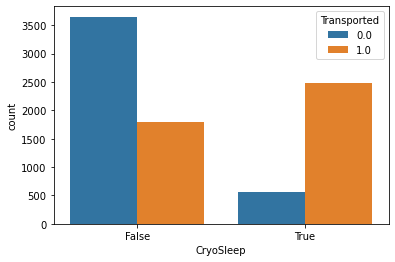

In [14]:
sn.countplot(merged['CryoSleep'], hue = merged['Transported'])

This variable may be also useful to predict some missing values. Probably sleeping people have not spent any money on the ship..

In [15]:
merged.groupby('CryoSleep')[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,2762500.0,5604644.0,2169748.0,3814594.0,3809418.0
True,0.0,0.0,0.0,0.0,0.0


Filling missing value in "expenses" columns with zeros for sleeping passengers. 

In [16]:
expenses = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for column in expenses:
    merged.loc[merged['CryoSleep'] == True, column] = merged.loc[merged['CryoSleep'] == True, column].fillna(0)

In [17]:
merged['CryoSleep'].fillna(True, inplace = True)

Creating Deck and Side columns from Cabin Column (deck/num/side)

In [18]:
merged['Deck'] = merged['Cabin'].str.split('/', expand = True)[0]
merged['Cabin_number'] = merged['Cabin'].str.split('/', expand = True)[1]
merged['Side'] = merged['Cabin'].str.split('/', expand = True)[2]

In [19]:
merged = merged.drop('Cabin', axis=1)

C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Side', ylabel='count'>

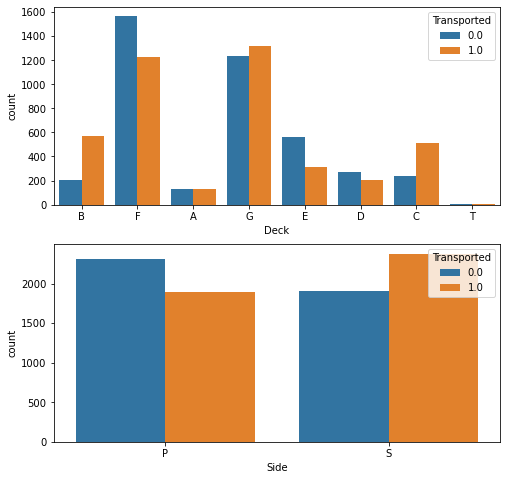

In [20]:
fig, ax = plt.subplots(2, 1, figsize = (8,8))

sn.countplot(merged['Deck'], hue = merged['Transported'], ax = ax[0])
sn.countplot(merged['Side'], hue = merged['Transported'], ax = ax[1])

In [21]:
merged['Deck'].fillna('F', inplace = True)
merged['Side'].fillna('S', inplace = True)

What about destination?

C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

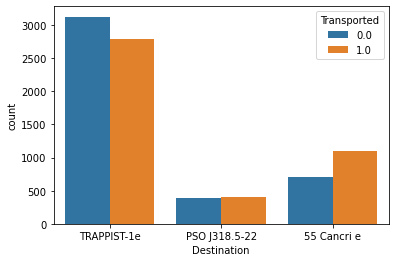

In [22]:
sn.countplot('Destination', hue = 'Transported', data=merged)

In [23]:
merged['Destination'].fillna('TRAPPIST-1e', inplace = True)

VIP

In [24]:
merged.groupby('VIP').agg({'VIP':'count', 'Transported':'mean'})

,VIP,Transported
VIP,,
False,12401,0.506332
True,273,0.381910


In [25]:
merged['VIP'].fillna(False, inplace = True)

<AxesSubplot:>

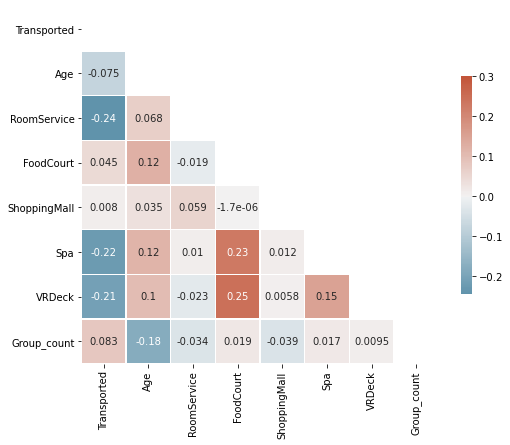

In [26]:
corr = merged[['Transported', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_count']].corr()

# 'mask'
mask = np.triu(np.ones_like(corr, dtype=bool))

# heatmap
fig, ax = plt.subplots(figsize=(8, 8))

cmap = sn.diverging_palette(230, 20, as_cmap=True)
sn.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='VRDeck', ylabel='Density'>

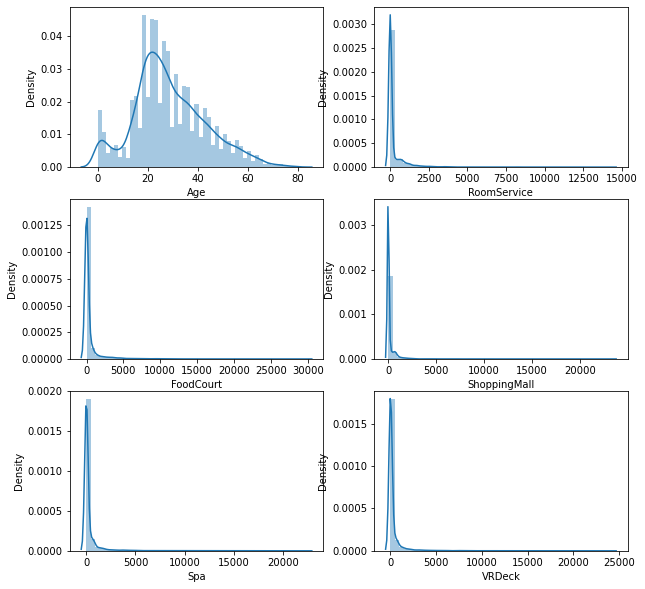

In [27]:
fig, ax = plt.subplots(3, 2, figsize = (10,10))

sn.distplot(merged['Age'], ax = ax[0,0])
sn.distplot(merged['RoomService'], ax = ax[0,1])
sn.distplot(merged['FoodCourt'], ax = ax[1,0])
sn.distplot(merged['ShoppingMall'], ax = ax[1,1])
sn.distplot(merged['Spa'], ax = ax[2,0])
sn.distplot(merged['VRDeck'], ax = ax[2,1])

Probably it would be good idea to convert this variables into binary one (0 for x=0, 1 for x>0). We can also sum all expenses into single column. Let's to both. 

In [28]:
merged['Expenses'] = np.sum(merged.iloc[:,6:11], axis=1)

In [29]:
# filling missing values in Age with mean value

merged['Age'].fillna(np.mean(merged['Age']), inplace = True)

In [30]:
merged['RoomService'].loc[merged['RoomService'].notna() == True] = [0 if x == 0 else 1 for x in merged['RoomService'].loc[merged['RoomService'].notna() == True]]
merged['FoodCourt'].loc[merged['FoodCourt'].notna() == True] = [0 if x == 0 else 1 for x in merged['FoodCourt'].loc[merged['FoodCourt'].notna() == True]]
merged['ShoppingMall'].loc[merged['ShoppingMall'].notna() == True] = [0 if x == 0 else 1 for x in merged['ShoppingMall'].loc[merged['ShoppingMall'].notna() == True]]
merged['Spa'].loc[merged['Spa'].notna() == True] = [0 if x == 0 else 1 for x in merged['Spa'].loc[merged['Spa'].notna() == True]]
merged['VRDeck'].loc[merged['VRDeck'].notna() == True] = [0 if x == 0 else 1 for x in merged['VRDeck'].loc[merged['VRDeck'].notna() == True]]
merged['Age_cut'] = pd.cut(merged['Age'], [-1,0,15,30,45,60,80])

C:\Users\kszaf\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kszaf\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kszaf\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [31]:
merged.iloc[:,6:11] = merged.iloc[:,6:11].fillna(0)

C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kszaf\anaconda3\lib\si

<AxesSubplot:xlabel='VRDeck', ylabel='count'>

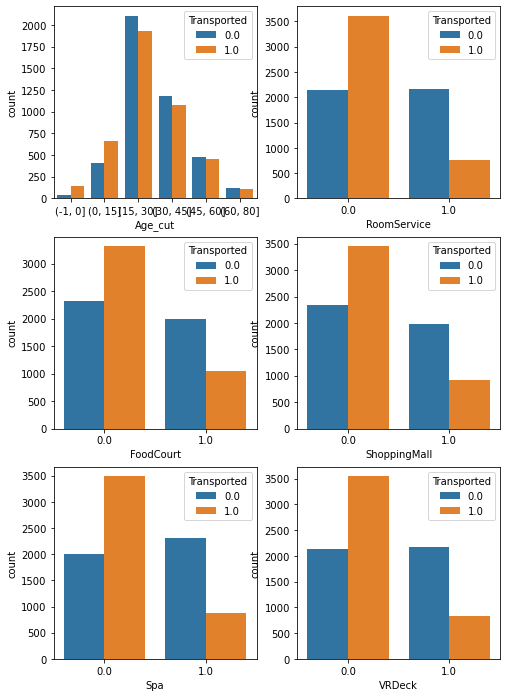

In [32]:
fig, ax = plt.subplots(3, 2, figsize = (8,12))

sn.countplot(merged['Age_cut'], hue = merged['Transported'], ax = ax[0,0])
sn.countplot(merged['RoomService'], hue = merged['Transported'], ax = ax[0,1])
sn.countplot(merged['FoodCourt'], hue = merged['Transported'], ax = ax[1,0])
sn.countplot(merged['ShoppingMall'], hue = merged['Transported'], ax = ax[1,1])
sn.countplot(merged['Spa'], hue = merged['Transported'], ax = ax[2,0])
sn.countplot(merged['VRDeck'], hue = merged['Transported'], ax = ax[2,1])

It seems that it's good to spend money on the ship...

<AxesSubplot:>

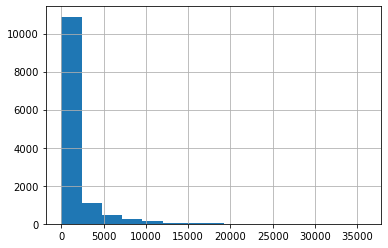

In [33]:
merged['Expenses'].hist(bins=15)

In [34]:
merged['Expenses_cut'] = pd.cut(merged['Expenses'], [-1,0,1000,2500,5000,40000])
merged['Expenses_cut'].value_counts()

(-1, 0]          5457
(0, 1000]        3235
(1000, 2500]     2271
(2500, 5000]     1076
(5000, 40000]     931
Name: Expenses_cut, dtype: int64

C:\Users\kszaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Expenses_cut', ylabel='count'>

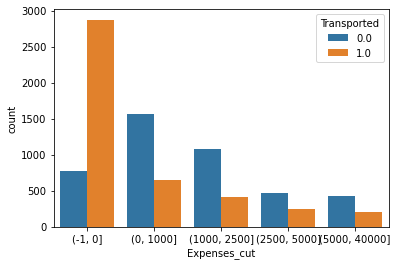

In [35]:
sn.countplot('Expenses_cut', hue = 'Transported', data=merged)

Mutual Information

In [36]:
from sklearn import feature_selection

train1 = merged.loc[merged['Transported'].notna() == True]

target = 'Transported'
numFeatures = ['Group_count', 'Cabin_number', 'Age']
catFeatures = ['HomePlanet', 'CryoSleep', 'Destination', 'Age_cut', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 
               'Spa', 'VRDeck', 'Single', 'Deck', 'Side', 'Expenses_cut']

print('Mutual Information for Survived and categorical variables: ')
for var in catFeatures:
    print(var,"=",feature_selection.mutual_info_classif(train1[var].astype('category').cat.codes.values.reshape(-1,1), 
                                                        train1[target].values)[0])

Mutual Information for Survived and categorical variables: 
HomePlanet = 0.023249847185013106
CryoSleep = 0.10845085464607629
Destination = 0.01040351676115625
Age_cut = 0.003051743462744838
VIP = 0
RoomService = 0.060280367604525154
FoodCourt = 0.02329522097797554
ShoppingMall = 0.043081936172634006
Spa = 0.053094321106976095
VRDeck = 0.0522288983991015
Single = 0.004330604063290888
Deck = 0.019551153967076074
Side = 0.0009526084692488279
Expenses_cut = 0.12209017890996265


Some features have very low MI, maybe we should look for some interactions?
Like: Destination*CryoSleep, Destination*Single

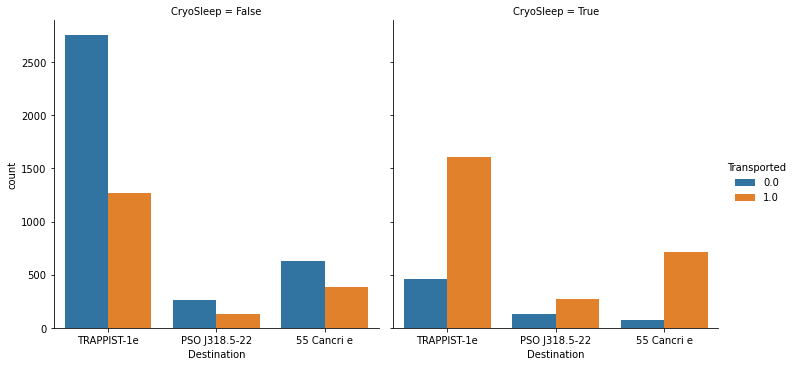

In [37]:
sn.catplot(data=merged, x="Destination", hue="Transported", col="CryoSleep", kind="count")

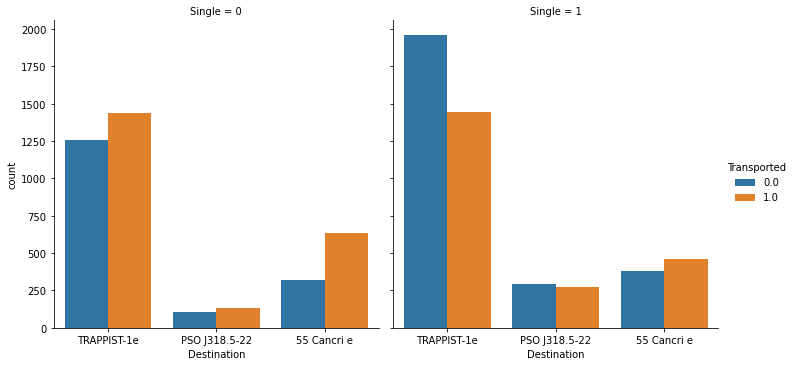

In [38]:
sn.catplot(data=merged, x="Destination", hue="Transported", col="Single", kind="count")

Encoding

In [40]:
merged['CryoSleep'] = merged['CryoSleep'].map({True: 1,False: 0})
merged['VIP'] = merged['VIP'].map({True: 1,False: 0})

In [41]:
cat = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 
      'Transported', 'Single', 'Deck', 'Side', 'Age_cut', 'Expenses_cut']

In [42]:
merged[cat] = merged[cat].astype(object)

In [43]:
merged.drop('GroupId', axis = 1, inplace = True)

Encode categorical variables to numerical format for random forests

In [44]:
cat_string = ['HomePlanet', 'Destination', 'Deck', 'Side', 'Age_cut', 'Expenses_cut']

In [45]:
from sklearn import preprocessing

merged_encoded = merged.copy()

maps = {}
for feature in cat_string:
    le = preprocessing.LabelEncoder()
    merged_encoded[feature] = le.fit_transform(merged[feature])
    maps[feature] = le

In [46]:
merged_encoded.drop(['Name', 'Cabin_number'], axis = 1, inplace = True)

In [48]:
#merged_encoded.to_csv('spaceship_rf.csv', index = False)